## Assignment - 2
### Name : Limalka Sadith
### Index No : 190538N

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

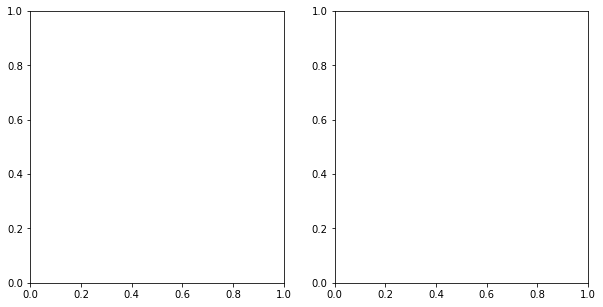

In [2]:
import numpy as np 
from scipy.optimize import minimize 
from scipy import linalg 
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,2,figsize = (10,5))
# np.random.seed(0) 
N = 100 
half_n = N//2 
r = 10 
s = r/16 
t = np.random. uniform (0 , 2*np . pi,half_n ) 
n = s*np.random. randn ( half_n ) 
x , y = ( r + n)*np . cos ( t ) , ( r + n)*np . sin ( t )

# ax[0].scatter(x,y)

# X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) ) 
# m, b = -1, 2 
# x = np . linspace (-12, 12 , half_n ) 
# y = m*x + b + s*np . random. randn ( half_n ) 
# X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) ) 
# X = np . vstack ((X_circ , X_line))

# ax[1].scatter(x,y)
# plt.show()


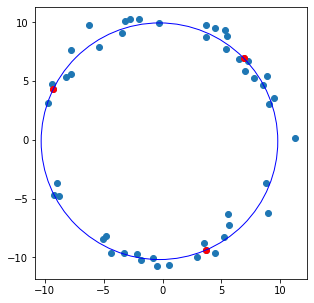

In [30]:
from numpy.linalg import inv

def RANSAC_circle(x_data, y_data, n):
	d_min = 99999
	best_circle = []
	best_sample = []

	for _ in range(n):
		sample = []
		save_ran = []
		

		# get three points from data
		i = 0
		while True:
			ran = np.random.randint(len(x_data))
			if ran not in save_ran:
				sample.append((x_data[ran], y_data[ran]))
				save_ran.append(ran)
				i += 1
			if i == 3:
				break


		# calculate A, B, C value from three points by using matrix

		pt1 = sample[0]
		pt2 = sample[1]
		pt3 = sample[2]

		A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
		B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
		inv_A = inv(A)

		c_x, c_y = np.dot(inv_A, B) / 2
		c_x, c_y = c_x[0], c_y[0]
		r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)


		d = 0
		for i in range(len(x_data)):
			dis = np.sqrt((x_data[i]-c_x)**2 + (y_data[i]-c_y)**2)

			# if abs(dis-r) < 5:
			# 	d += abs(dis-r)
			if dis >= r:
				d += dis - r
			else:
				d += r - dis
		
		# a, b, = c_x,c_y
		# x_sample, y_sample = [i[0] for i in sample],[i[1] for i in sample]
		# ax.scatter(x_sample, y_sample, c='r', marker='o', label='data')
		# circle = plt.Circle((a, b), radius=r, color='m', fc='y', fill=False)
		# ax.add_artist(circle)


		if d_min > d:
			d_min = d
			best_circle = [c_x, c_y, r]
			best_sample = sample.copy()

	return best_circle,best_sample


fig,ax = plt.subplots(figsize=(5,5))
ax.scatter(x,y)

circle, sample = RANSAC_circle(x,y,10)
a, b, r = circle
x_sample, y_sample = [i[0] for i in sample],[i[1] for i in sample]


ax.scatter(x_sample, y_sample, c='r', marker='o', label='data')

circle = plt.Circle((a, b), radius=r, color='b', fc='y', fill=False)
# ax.gca().add_patch(circle)
ax.add_artist(circle)
ax.axis('scaled')
# ax.legend()
plt.show()


In [31]:
from skimage.io import imread, imshow
from skimage import transform
import matplotlib.pyplot as plt
import numpy as np

[[150 200]
 [120 450]
 [500 250]
 [470 450]]


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


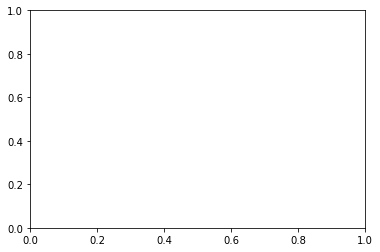

In [83]:
img = imread('001.jpg')
# img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# imshow(img)

# flag = cv.imread('flag.png',cv.IMREAD_COLOR)
flag = imread('flag.png')
# imshow(flag)

#source coordinates
src = np.array([0, 0, 
                0, 900,
                1800, 0,
                1800, 900,]).reshape((4, 2))
#destination coordinates
dst = np.array([150, 200, 
                120, 450,
                500,250,
                470, 450,]).reshape((4, 2))
print(dst)
#using skimage’s transform module where ‘projective’ is our desired parameter
tform = transform.estimate_transform('projective', src, dst)
tf_img = transform.warp(flag, tform.inverse)
#plotting the transformed image
fig, ax = plt.subplots()
dest = cv.addWeighted(tf_img, 1, img, 1, 0.0)
print(img[0],tf_img[0])
# ax.imshow(img)
# ax.imshow(tf_img)
ax.imshow(dest)
_ = ax.set_title('projective transformation')